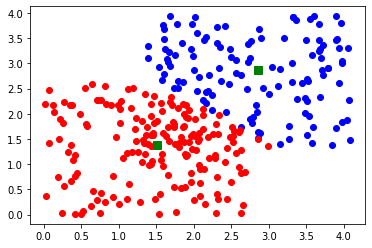

In [1]:
#Visualisation how k-means works

from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
from scipy.cluster.vq import kmeans,vq,whiten
 
data = vstack((rand(150,2) + array([.5,.5]),rand(150,2)))
data =  whiten(data)
# K-Means for K = 2
centroids,_ = kmeans(data,2)
#assign vectors
idx,_ = vq(data,centroids)
 
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'or')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

In [2]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [3]:
folder = '/content/drive/My Drive/ML/'

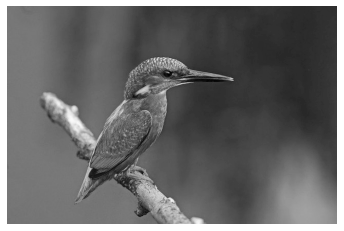

In [17]:
from pylab import plot,show,figure,imshow,cm, imread, axis
import matplotlib as plt
import numpy as np
from scipy.cluster.vq import kmeans,vq
 
image = imread(folder + 'bird.jpg')
image = image.mean(axis=2)
imshow(image, cmap=cm.gray)
axis('off')
show()

In [25]:
data = image[:]
data.shape = 422*640,1

In [26]:
K_max = 9
J_inter = np.ones(K_max)*1e16
J_intra = np.zeros(K_max)
centroids =[]
for K in range(2,K_max):
    trial =0
    while (len(centroids)<K) & (trial<20):
        centroids, J_intra[K] = kmeans(data,K)
        trial+=1
    print('K: ', K, len(centroids))
    for ki in range(len(centroids)):
        for kj in range(ki):
            #print(ki, kj)
            #print(centroids[ki])
            #print(centroids[kj])
            d = ((centroids[ki]-centroids[kj]).T @ (centroids[ki]-centroids[kj]))**0.5
            if J_inter[K] > d:
              J_inter[K] = d
    print(K, J_intra[K],J_inter[K])

K:  2 2
2 13.653060282857183 56.705156223684384
K:  3 3
3 10.507722579015343 32.75783141424294
K:  4 4
4 7.663059411484133 30.696428759909438
K:  5 5
5 5.963191183630799 21.228862135862386
K:  6 6
6 5.219542820866746 21.228862135862386
K:  7 7
7 4.453708420531977 16.037755514394263
K:  8 8
8 3.925770231054947 11.477351547139882


2


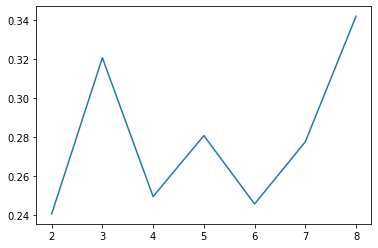

In [27]:
figure(1)
plot(range(2,K_max),J_intra[2:]/J_inter[2:])
K_opt = np.argmin(J_intra[2:]/J_inter[2:])+2
 
print(K_opt)

#looking for smallest K

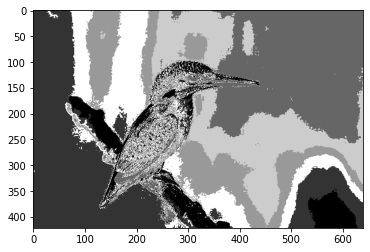

In [28]:
#we will use 6, two is way to small for that detailed picture - we'd get only two colors of pixels
centroids,J_intra[K] = kmeans(data, 6)
idx,_ = vq(data,centroids)
idx.shape = 422,640
#plt.figure(2)
imshow(idx, cmap=cm.gray)
 
show()

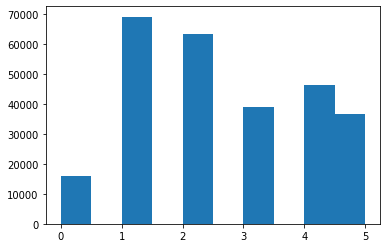

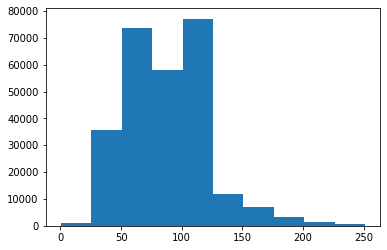

In [29]:
#compare data and idx

import matplotlib.pyplot
idx.shape = 422*640,1
figure(3)
properties = matplotlib.pyplot.hist(idx)

figure(4)
properties = matplotlib.pyplot.hist(data)